In [79]:
!pip install pandas

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [81]:
df = pd.read_csv(r"C:\Users\najuw\OneDrive\Documentos\GitHub\ENS410064\dados_de_entrada\SC.csv", sep=';', encoding='latin1')
df

,Ano,Mes,Dia,Hora,Minuto,Estacao,Codigo,Poluente,Valor,Unidade,Tipo,Testacao
0,2023,1,1,0,30,Capivari de Baixo,SC_002,PTS,20,ug/m3,Automatica,Referencia
1,2023,1,1,1,30,Capivari de Baixo,SC_002,PTS,17,ug/m3,Automatica,Referencia
2,2023,1,1,2,30,Capivari de Baixo,SC_002,PTS,21,ug/m3,Automatica,Referencia
3,2023,1,1,3,30,Capivari de Baixo,SC_002,PTS,16,ug/m3,Automatica,Referencia
4,2023,1,1,4,30,Capivari de Baixo,SC_002,PTS,17,ug/m3,Automatica,Referencia
...,...,...,...,...,...,...,...,...,...,...,...,...
201475,2023,12,31,19,30,Vila Moema,SC_001,CO,"0,0805",ppm,Automatica,Referencia
201476,2023,12,31,20,30,Vila Moema,SC_001,CO,"0,0929",ppm,Automatica,Referencia
201477,2023,12,31,21,30,Vila Moema,SC_001,CO,"0,1171",ppm,Automatica,Referencia
201478,2023,12,31,22,30,Vila Moema,SC_001,CO,"0,165",ppm,Automatica,Referencia


In [82]:
df['Valor'] = pd.to_numeric(df['Valor'], errors='coerce')
df

,Ano,Mes,Dia,Hora,Minuto,Estacao,Codigo,Poluente,Valor,Unidade,Tipo,Testacao
0,2023,1,1,0,30,Capivari de Baixo,SC_002,PTS,20.0,ug/m3,Automatica,Referencia
1,2023,1,1,1,30,Capivari de Baixo,SC_002,PTS,17.0,ug/m3,Automatica,Referencia
2,2023,1,1,2,30,Capivari de Baixo,SC_002,PTS,21.0,ug/m3,Automatica,Referencia
3,2023,1,1,3,30,Capivari de Baixo,SC_002,PTS,16.0,ug/m3,Automatica,Referencia
4,2023,1,1,4,30,Capivari de Baixo,SC_002,PTS,17.0,ug/m3,Automatica,Referencia
...,...,...,...,...,...,...,...,...,...,...,...,...
201475,2023,12,31,19,30,Vila Moema,SC_001,CO,NaN,ppm,Automatica,Referencia
201476,2023,12,31,20,30,Vila Moema,SC_001,CO,NaN,ppm,Automatica,Referencia
201477,2023,12,31,21,30,Vila Moema,SC_001,CO,NaN,ppm,Automatica,Referencia
201478,2023,12,31,22,30,Vila Moema,SC_001,CO,NaN,ppm,Automatica,Referencia


In [83]:
df.dtypes

Ano           int64
Mes           int64
Dia           int64
Hora          int64
Minuto        int64
Estacao      object
Codigo       object
Poluente     object
Valor       float64
Unidade      object
Tipo         object
Testacao     object
dtype: object

In [84]:
df['Valor'] = pd.to_numeric(df['Valor'], errors='coerce')
df

,Ano,Mes,Dia,Hora,Minuto,Estacao,Codigo,Poluente,Valor,Unidade,Tipo,Testacao
0,2023,1,1,0,30,Capivari de Baixo,SC_002,PTS,20.0,ug/m3,Automatica,Referencia
1,2023,1,1,1,30,Capivari de Baixo,SC_002,PTS,17.0,ug/m3,Automatica,Referencia
2,2023,1,1,2,30,Capivari de Baixo,SC_002,PTS,21.0,ug/m3,Automatica,Referencia
3,2023,1,1,3,30,Capivari de Baixo,SC_002,PTS,16.0,ug/m3,Automatica,Referencia
4,2023,1,1,4,30,Capivari de Baixo,SC_002,PTS,17.0,ug/m3,Automatica,Referencia
...,...,...,...,...,...,...,...,...,...,...,...,...
201475,2023,12,31,19,30,Vila Moema,SC_001,CO,NaN,ppm,Automatica,Referencia
201476,2023,12,31,20,30,Vila Moema,SC_001,CO,NaN,ppm,Automatica,Referencia
201477,2023,12,31,21,30,Vila Moema,SC_001,CO,NaN,ppm,Automatica,Referencia
201478,2023,12,31,22,30,Vila Moema,SC_001,CO,NaN,ppm,Automatica,Referencia


In [85]:
# Filtrar dados apenas da estação SC_002 e poluentes que vou analisar

filtred_SC_002_df = df.loc[
(df['Codigo'] == 'SC_002') &
(df['Poluente'].isin(['MP10', 'PTS', 'SO2', 'NO2'])) &
(df['Valor'] >= 0)]

filtred_SC_002_df.loc[:, 'Date'] = df[['Ano', 'Mes', 'Dia', 'Hora', 'Minuto']].apply(lambda x: datetime(x['Ano'], x['Mes'], x['Dia'], x['Hora'], x['Minuto']), axis=1)

filtred_SC_002_df = filtred_SC_002_df.set_index('Date')

filtred_SC_002_df = filtred_SC_002_df[['Poluente','Valor', 'Unidade']]
filtred_SC_002_df

C:\Users\najuw\AppData\Local\Temp\ipykernel_988\3398637596.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtred_SC_002_df.loc[:, 'Date'] = df[['Ano', 'Mes', 'Dia', 'Hora', 'Minuto']].apply(lambda x: datetime(x['Ano'], x['Mes'], x['Dia'], x['Hora'], x['Minuto']), axis=1)


,Poluente,Valor,Unidade
Date,,,
2023-01-01 00:30:00,PTS,20.0,ug/m3
2023-01-01 01:30:00,PTS,17.0,ug/m3
2023-01-01 02:30:00,PTS,21.0,ug/m3
2023-01-01 03:30:00,PTS,16.0,ug/m3
2023-01-01 04:30:00,PTS,17.0,ug/m3
...,...,...,...
2023-12-16 07:30:00,NO2,8.0,ug/m3
2023-12-17 18:30:00,NO2,6.0,ug/m3
2023-12-23 02:30:00,NO2,6.0,ug/m3


In [86]:
print(filtred_SC_002_df['Poluente'].unique())

['PTS' 'SO2' 'MP10' 'NO2']


In [103]:
df_PTS = filtred_SC_002_df.query('Poluente =="PTS"')
df_SO2 = filtred_SC_002_df.query('Poluente =="SO2"')
df_MP10 = filtred_SC_002_df.query('Poluente == "MP10"')
df_NO2 = filtred_SC_002_df.query('Poluente == "NO2"')

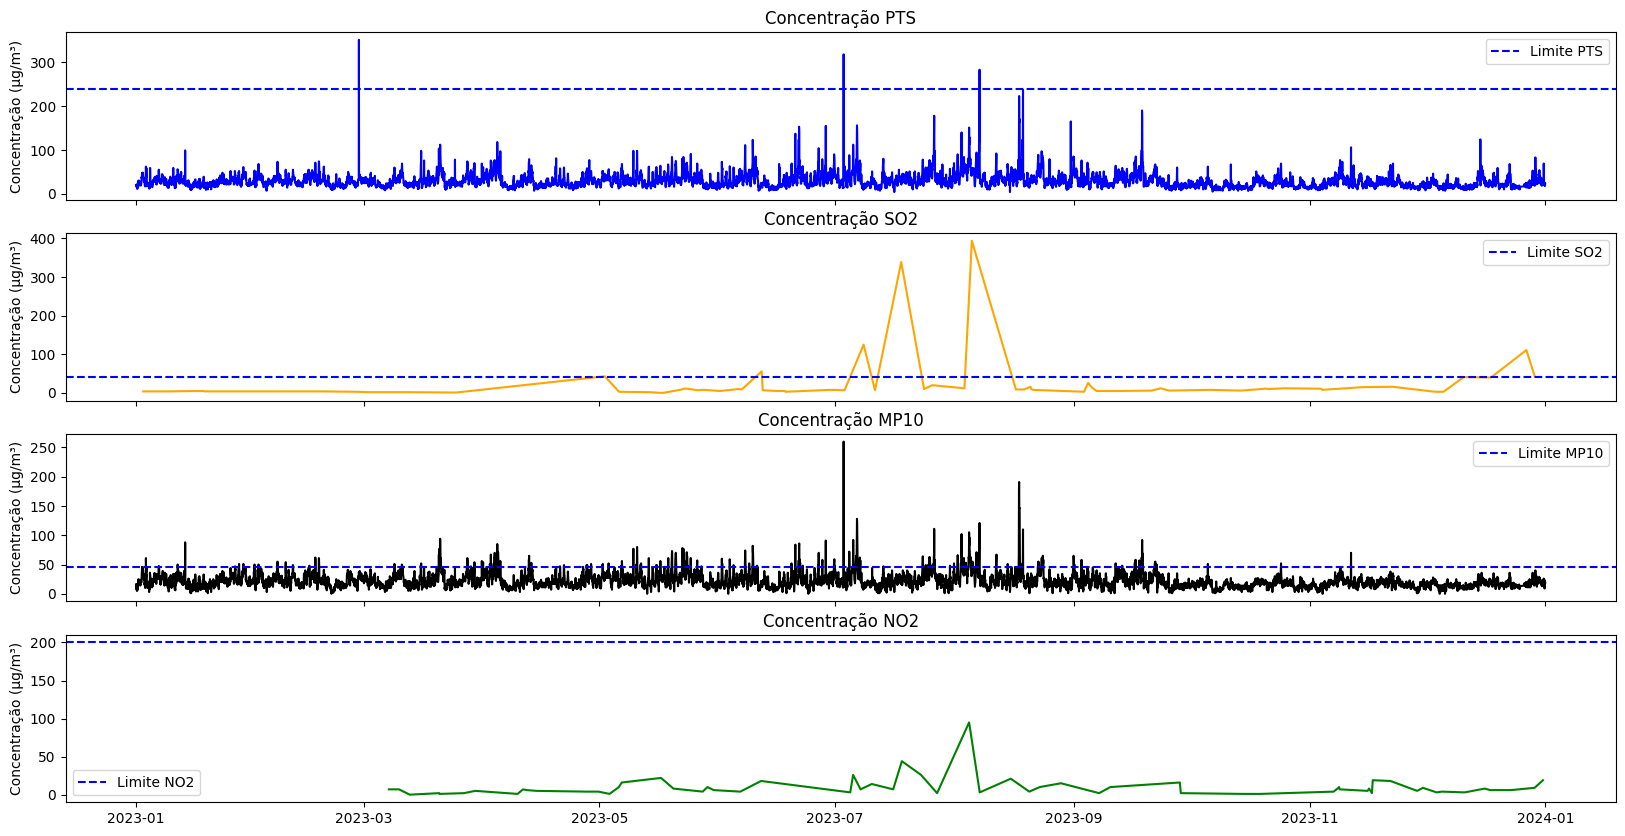

In [104]:
data = [
    (df_PTS, 'Concentração PTS', 'Concentração (µg/m³)', 240, 'blue'),
    (df_SO2, 'Concentração SO2', 'Concentração (µg/m³)', 40, 'orange'),
    (df_MP10, 'Concentração MP10', 'Concentração (µg/m³)', 45, 'black'),
    (df_NO2, 'Concentração NO2', 'Concentração (µg/m³)', 200, 'green')
]

# Criando subplots
fig, ax = plt.subplots(4, sharex=True, figsize=(20, 10))

# Loop para plotar cada gráfico
for i, (df, title, ylabel, limite, color) in enumerate(data):
    ax[i].plot(df.index, df['Valor'], color=color)
    ax[i].axhline(y=limite, color='blue', linestyle='--', label=f'Limite {title.split()[1]}')
    ax[i].set_title(title)
    ax[i].set_ylabel(ylabel)
    ax[i].legend()


plt.show()

In [105]:
df_SO2

,Poluente,Valor,Unidade
Date,,,
2023-01-02 20:30:00,SO2,4.0,ug/m3
2023-01-02 22:30:00,SO2,4.0,ug/m3
2023-01-07 02:30:00,SO2,4.0,ug/m3
2023-01-08 05:30:00,SO2,4.0,ug/m3
2023-01-09 15:30:00,SO2,4.0,ug/m3
...,...,...,...
2023-12-05 15:30:00,SO2,3.0,ug/m3
2023-12-10 20:30:00,SO2,41.0,ug/m3
2023-12-17 22:30:00,SO2,40.0,ug/m3
